<a href="https://colab.research.google.com/github/LuisAdrRamos/Datos_AdrianRamos/blob/main/Deber_Libro_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import files
import plotly as plt
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as pt
from wordcloud import WordCloud as wc
import re
from nltk.corpus import stopwords

In [4]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

with open(filename, 'r') as f:
  file_contents = f.read()
  print("File contents:")

Saving libro.txt to libro.txt
User uploaded file "libro.txt" with length 2016452 bytes
File contents:


In [9]:
book = file_contents

sentences = nltk.sent_tokenize(book)
for sentence in sentences:
  print(sentence)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
imagined we had a fox to deal with, od-rat it, it turns out to be a
badger at last!"
"Pray, my good neighbour," said Allworthy, "drop your metaphors, and
speak a little plainer."
"Why, then," says the squire, "to tell you
plainly, we have been all this time afraid of a son of a whore of a
bastard of somebody's, I don't know whose, not I.
And now here's a
confounded son of a whore of a lord, who may be a bastard too for what
I know or care, for he shall never have a daughter of mine by my
consent.
They have beggared the nation, but they shall never beggar
me.
My land shall never be sent over to Hanover."
"You surprize me much, my good friend," said Allworthy.
"Why, zounds!
I am surprized myself," answered the squire.
"I went to zee sister
Western last night, according to her own appointment, and there I was
had into a whole room full of women.
There was my lady cousin
Bellaston, and my Lady Betty, and my Lady Catherine, 

In [10]:
def clean_text(text):
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)

  tokens = nltk.word_tokenize(text)

  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words and len(token) > 4]

  cleanned_text = " ".join(tokens)
  return cleanned_text

cleanned_book = clean_text(book)
cleanned_book

'Project Gutenberg eBook History Jones Foundling ebook anyone anywhere United States parts world almost restrictions whatsoever reuse terms Project Gutenberg License included ebook online wwwgutenbergorg located United States check country located using eBook Title History Jones Foundling Author Henry Fielding Release September eBook recently updated Language English Credits produced Carlo Traverso Charles Franks Online Distributed Proofreading crosschecked different editions available online produced David Widger START PROJECT GUTENBERG EBOOK HISTORY JONES FOUNDLING Produced Carlo Traverso Charles Franks Online Distributed Proofreading crosschecked different editions available online HISTORY JONES FOUNDLING Henry Fielding CONTENTS DEDICATION CONTAINING BIRTH FOUNDLING NECESSARY PROPER ACQUAINT READER BEGINNING HISTORY Chapter introduction feast Chapter short description squire Allworthy fuller account Bridget Allworthy sister Chapter accident befel Allworthy return decent behaviour De

In [13]:
stop_words = sorted(nltk.corpus.stopwords.words('english'))
tokens = nltk.word_tokenize(cleanned_book)
relevant = [token for token in tokens if token not in stop_words]

In [14]:
relevant

['Project',
 'Gutenberg',
 'eBook',
 'History',
 'Jones',
 'Foundling',
 'ebook',
 'anyone',
 'anywhere',
 'United',
 'States',
 'parts',
 'world',
 'almost',
 'restrictions',
 'whatsoever',
 'reuse',
 'terms',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'ebook',
 'online',
 'wwwgutenbergorg',
 'located',
 'United',
 'States',
 'check',
 'country',
 'located',
 'using',
 'eBook',
 'Title',
 'History',
 'Jones',
 'Foundling',
 'Author',
 'Henry',
 'Fielding',
 'Release',
 'September',
 'eBook',
 'recently',
 'updated',
 'Language',
 'English',
 'Credits',
 'produced',
 'Carlo',
 'Traverso',
 'Charles',
 'Franks',
 'Online',
 'Distributed',
 'Proofreading',
 'crosschecked',
 'different',
 'editions',
 'available',
 'online',
 'produced',
 'David',
 'Widger',
 'START',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'HISTORY',
 'JONES',
 'FOUNDLING',
 'Produced',
 'Carlo',
 'Traverso',
 'Charles',
 'Franks',
 'Online',
 'Distributed',
 'Proofreading',
 'crosschecked',
 'different',
 'edition

In [15]:
freq = nltk.FreqDist(relevant)
top_words = freq.most_common(10)
top_words

[('Jones', 1635),
 ('would', 1297),
 ('Sophia', 894),
 ('could', 688),
 ('indeed', 670),
 ('never', 648),
 ('great', 646),
 ('little', 630),
 ('Allworthy', 592),
 ('though', 589)]

In [34]:
fig = px.bar(
    x=[word[0] for word in top_words],
    y=[word[1] for word in top_words],
    text=[word[1] for word in top_words],
    title='Top 10 palabras mas usadas en el libro'
)

fig.show()

La palabra "Jones" es la más utilizada con 1635 ocurrencias, seguida de "would" y "Sophia".
Las demás palabras tienen frecuencias significativamente más bajas, todas entre 600 y 700.
La distribución tiene una caída pronunciada después de las tres palabras más usadas, lo cual indica que hay palabras destacadas en el texto que aparecen con mucha mayor frecuencia.

In [31]:
fig2 = px.pie(
    values=[word[1] for word in top_words],
    names=[word[0] for word in top_words],
    title='Distribucion de palabras mas repetidas en el libro'
)

fig2.show()

La palabra "Jones" representa el 19.7% del total, siendo la sección más grande del gráfico.
"Would" y "Sophia" también ocupan secciones importantes del gráfico, 15.6% y 10.8%, respectivamente.
Las demás palabras tienen proporciones cercanas al 7-8%, lo que refuerza la diferencia significativa entre las palabras más repetidas y las menos frecuentes de este top 10.

In [32]:
fig3 = px.line(
    x=[word[0] for word in top_words],
    y=[word[1] for word in top_words],
    text=[word[1] for word in top_words],
    title='Linea de uso de las 10 palabras mas usadas en el libro'
)

fig3.show()

El gráfico de líneas muestra la misma información de frecuencia, pero en una representación que resalta más las tendencias de caída.
Se observa claramente una disminución brusca entre las palabras más usadas "Jones" y "would" y las demás.
La tendencia se estabiliza a partir de la cuarta palabra "could" hasta la décima "though", todas con valores cercanos.

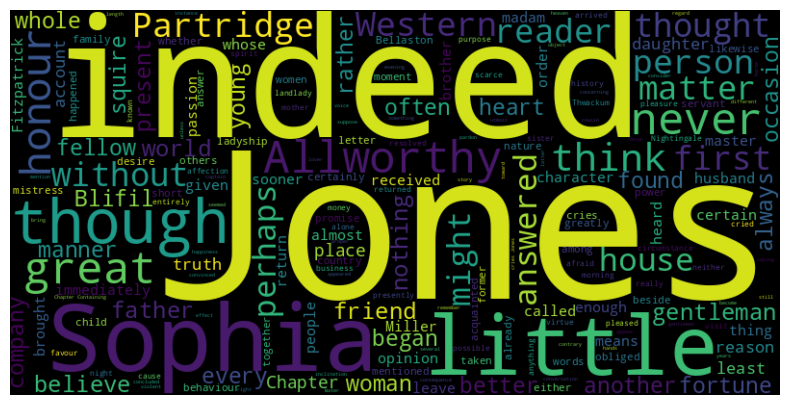

In [28]:
fig4 = wc(width=800, height=400).generate(cleanned_book)
pt.figure(figsize=(10, 5))
pt.imshow(fig4, interpolation='bilinear')
pt.axis('off')
pt.show()

La nube de palabras proporciona una representación visual de las palabras más repetidas en el texto, donde el tamaño de cada palabra está relacionado con su frecuencia.
Las palabras "Jones", "would", y "Sophia" deberían aparecer más grandes debido a su alta frecuencia.
Esta visualización es útil para identificar rápidamente las palabras más importantes del texto sin necesidad de analizar valores numéricos específicos.

In [29]:
sentimientos = sa.polarity_scores(cleanned_book)

if sentimientos['compound'] >= 0.05:
  print('El libro es positivo')
elif sentimientos['compound'] <= -0.05:
  print('El libro es negativo')
else:
  print('El libro es neutral')

print('El puntaje de sentimientos del libro es de: ', sentimientos)

El libro es positivo
El puntaje de sentimientos del libro es de:  {'neg': 0.157, 'neu': 0.6, 'pos': 0.244, 'compound': 1.0}


Aunque la mayoría del texto es neutral 60%, el tono positivo 24.4% supera al negativo 15.7%, lo que inclina el análisis hacia una valoración general positiva.
El puntaje compound = 1.0 sugiere que las palabras positivas y su contexto predominan con fuerza en el contenido analizado.

El análisis de sentimientos sugiere que el libro contiene un mensaje global positivo, aunque una gran parte del texto sea neutral. Las palabras que aparecen con más frecuencia o en contextos clave probablemente influyen en esta percepción positiva.